# Diabetes Prediction

### Importing libraries

In [11]:
import pandas
import matplotlib.pyplot
import seaborn

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')


In [12]:
df = pandas.read_csv('D:\ML-Projects\Diabetes Prediction\Dataset\diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
df.isna()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [15]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Dividing the data into input and target features

In [16]:
X = df.drop(columns=['Outcome'])
Y = df['Outcome']

In [17]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [18]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [19]:
matplotlib.pyplot.subplot

<function matplotlib.pyplot.subplot(*args, **kwargs) -> 'Axes'>

### Data Normalization

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X[:] = scaler.fit_transform(X)

In [21]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [23]:
X_train.shape, X_test.shape

((614, 8), (154, 8))

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [25]:
def kfold(estimator, input, target):
    return cross_val_score(estimator, input, target).mean() * 100

In [26]:
kfold(LinearRegression(), X_train, Y_train)

27.122320832243652

In [27]:
kfold(SVC(), X_train, Y_train)

75.8963081434093

In [28]:
kfold(RandomForestClassifier(), X_train, Y_train)

77.03585232573637

In [29]:
clf = GridSearchCV(RandomForestClassifier(), {
    'n_estimators' : [50, 100, 150, 210],
    'max_depth' : [3, 5, 7,10],
    'min_samples_split' :[2, 3, 4, 7]
})

clf.fit(X_train, Y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, 10],
                         'min_samples_split': [2, 3, 4, 7],
                         'n_estimators': [50, 100, 150, 210]})

In [30]:
clf_df = pandas.DataFrame(clf.cv_results_)

In [31]:
clf_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_split', 'param_n_estimators',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [32]:
clf_df[[  'param_max_depth', 'param_min_samples_split', 'param_n_estimators','mean_test_score']].sort_values(by='mean_test_score', ascending= False)

,param_max_depth,param_min_samples_split,param_n_estimators,mean_test_score
50,10,2,150,0.783407
58,10,4,150,0.783407
32,7,2,50,0.781754
45,7,7,100,0.780181
37,7,3,100,0.780168
...,...,...,...,...
15,3,7,210,0.752486
4,3,3,50,0.752486
11,3,4,210,0.752472
6,3,3,150,0.750846


In [33]:
model = RandomForestClassifier(
    n_jobs=1,
    n_estimators=210,
    min_samples_split=4,
    max_depth=7
)

model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=7, min_samples_split=4, n_estimators=210,
                       n_jobs=1)

In [34]:
Y_test[:50]

668    0
324    0
624    0
690    0
473    0
204    0
97     0
336    0
568    0
148    0
667    1
212    0
199    1
265    0
760    0
356    1
501    0
457    0
604    1
213    1
636    0
544    0
86     0
208    0
281    0
209    1
581    0
639    0
328    1
431    0
120    1
363    1
425    1
300    1
67     0
338    1
579    1
66     1
582    0
78     1
482    0
456    0
30     0
635    1
33     0
31     1
39     1
77     0
299    0
487    0
Name: Outcome, dtype: int64

In [35]:
pred = model.predict(X_test)
pred[:5]

array([0, 0, 0, 0, 1], dtype=int64)

In [36]:
accuracy_score(Y_test, pred) * 100

73.37662337662337

In [37]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79        99
           1       0.62      0.64      0.63        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



Text(50.722222222222214, 0.5, 'Actual')

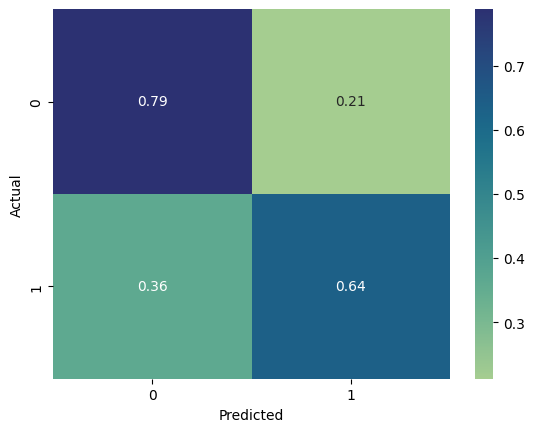

In [38]:
cf = confusion_matrix(Y_test, pred, normalize='true')
seaborn.heatmap(cf, annot = True, cmap='crest')

matplotlib.pyplot.xlabel('Predicted')
matplotlib.pyplot.ylabel('Actual')